## Import Libraries

In [41]:
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler

## Load IRIS Dataset
### (for appropriate 2D representation, Sepal Length and Sepal Width used)

In [3]:
iris = datasets.load_iris()
X = iris.data[:, :2]  
y = iris.target

## Train-Test Split

In [5]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.30,random_state=123)

# Part A: Logistic Regression

In [7]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
y_pred = logreg.predict(x_test)
print(logreg.score(x_test, y_test))

0.755555555556


### Classification Report

In [9]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        18
          1       0.47      0.70      0.56        10
          2       0.75      0.53      0.62        17

avg / total       0.79      0.76      0.76        45



### Grid Search

In [11]:
clf = GridSearchCV(logreg,
                   {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
                    scoring = 'accuracy',
                    verbose=1)

In [12]:
clf.fit(x_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
0.733333333333
{'C': 10}


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.0s finished


In [14]:
logreg = LogisticRegression(C=10)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(logreg.score(x_test, y_test))
print(classification_report(y_test,y_pred))
print("Improved Values of Precision and Recall with C = 10")

0.866666666667
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        18
          1       0.62      1.00      0.77        10
          2       1.00      0.65      0.79        17

avg / total       0.92      0.87      0.87        45

Improved Values of Precision and Recall with C = 10


### Function to Plot Decision Boundaries

In [15]:
def plot_boundary(model):
    h = .02

    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = x_train[:, 0].min() - .5, x_train[:, 0].max() + .5
    y_min, y_max = x_train[:, 1].min() - .5, x_train[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z_pred = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z_pred.reshape(xx.shape)
    plt.figure(1, figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

### Plot Logistic Regression Decision Boundary

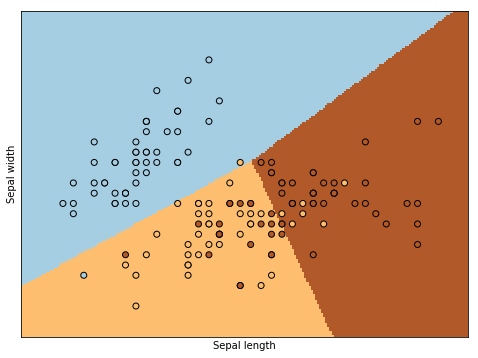

In [17]:
plot_boundary(logreg)

# Part B: Linear SVC

### Scaling feature values

In [42]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.30,random_state=123)

In [43]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [44]:
y_pred = linear_svc.predict(x_test)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        18
          1       0.59      1.00      0.74        10
          2       1.00      0.59      0.74        17

avg / total       0.91      0.84      0.84        45



## Grid Search

In [45]:
linearsvc_clf = GridSearchCV(linear_svc,
                    {'C': [0.001, 0.01, 0.1, 1, 10]
                    },
                    verbose=1)

In [46]:
linearsvc_clf.fit(x_train,y_train)
print(linearsvc_clf.best_score_)
print(linearsvc_clf.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
0.733333333333
{'C': 1}


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


### Classification Report

In [47]:
y_pred = linearsvc_clf.predict(x_test)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        18
          1       0.59      1.00      0.74        10
          2       1.00      0.59      0.74        17

avg / total       0.91      0.84      0.84        45



## Linear SVM Decision Boundary

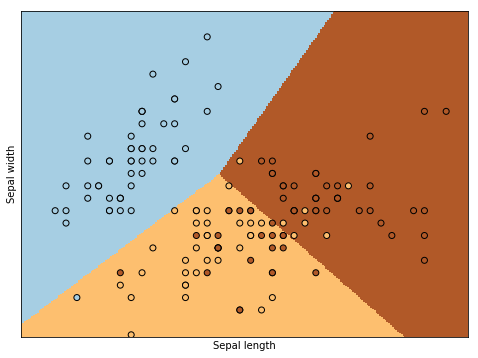

In [48]:
linear_svc = LinearSVC(C=1)
linear_svc.fit(x_train,y_train)
plot_boundary(linear_svc)

# Part C: SVC with RBF and Polynomial kernels

## RBF Kernel

In [85]:
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [86]:
y_pred = rbf_svc.predict(x_test)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        18
          1       0.50      0.90      0.64        10
          2       0.89      0.47      0.62        17

avg / total       0.85      0.78      0.78        45



### Grid Search

In [87]:
rbf_clf = GridSearchCV(rbf_svc,
                   {'C': [0.01,0.1,1,10],
                    'gamma': [0.1,0.3,0.5,0.7,0.9]},
                    verbose=1)

In [88]:
rbf_clf.fit(x_train,y_train)
print(rbf_clf.best_score_)
print(rbf_clf.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
0.742857142857
{'C': 10, 'gamma': 0.9}


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished


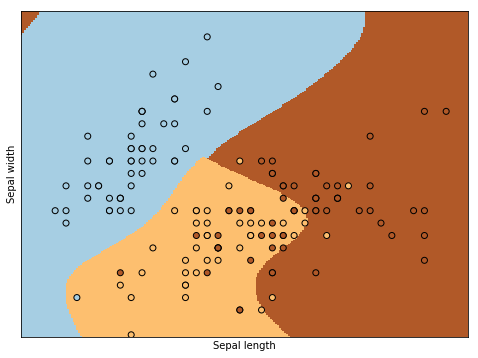

In [93]:
rbf_svc = SVC(kernel='rbf',C=1,gamma=0.7)
rbf_svc.fit(x_train,y_train)
plot_boundary(rbf_svc)

### Classification Report: RBF Kernel

In [94]:
y_pred = rbf_svc.predict(x_test)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        18
          1       0.47      0.80      0.59        10
          2       0.80      0.47      0.59        17

avg / total       0.81      0.76      0.76        45



## Polynomial Kernel

In [74]:
poly_svc = SVC(kernel='poly',degree=3)
poly_svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
y_pred = poly_svc.predict(x_test)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      0.83      0.91        18
          1       0.38      1.00      0.56        10
          2       1.00      0.24      0.38        17

avg / total       0.86      0.64      0.63        45



### Grid Search

In [96]:
poly_clf = GridSearchCV(poly_svc,
                   {'C': [0.01,0.1,1,10],
                    'degree': [2,3,4],
                    'gamma': [0.1,0.3,0.5,0.7,0.9]
                   },
                    verbose=1)

In [97]:
poly_clf.fit(x_train,y_train)
print(poly_clf.best_score_)
print(poly_clf.best_params_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
0.742857142857
{'C': 1, 'degree': 3, 'gamma': 0.7}


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.2s finished


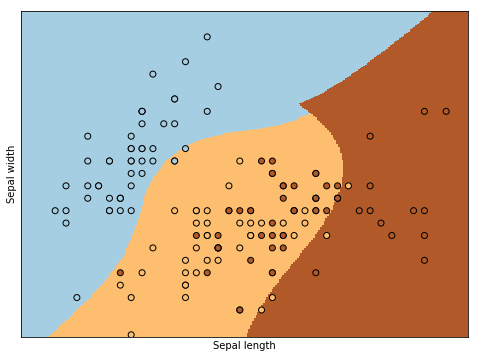

In [100]:
poly_svc = SVC(kernel='poly',C=1,degree=3,gamma=0.7)
poly_svc.fit(x_train,y_train)
plot_boundary(poly_svc)

### Classification Report: Polynomial Kernel

In [95]:
y_pred = poly_svc.predict(x_test)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      0.83      0.91        18
          1       0.38      0.90      0.53        10
          2       0.83      0.29      0.43        17

avg / total       0.80      0.64      0.65        45

